In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import streamlit as st
import fontstyle as font
import scipy.stats as st
import xgboost as xgb
import tensorflow as tf
import pmdarima as pm
import pymysql
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import requests
import csv
from bson import ObjectId
from bs4 import BeautifulSoup
from tabulate import tabulate
from datetime import datetime
from IPython.display import display, Markdown, HTML
from pymongo import MongoClient
from pymongo.server_api import ServerApi
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from ydata_profiling import ProfileReport
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering,MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings('ignore')

In [3]:
#################################### PART B – Classification Modeling for Business Decision Making  ####################################

In [5]:
### TASK 1 – Data Preprocessing

In [7]:
# A – Cleaning the Dataset, handling missing values, and removing outliers

In [17]:
# Downloading the datasetfrom Kaggle.com
file_path = kagglehub.dataset_download("sumaiyatasmeem/heart-disease-classification-dataset")

print("File location of the dataset:", file_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 4.15k/4.15k [00:00<00:00, 1.42MB/s]

Extracting files...
File location of the dataset: C:\Users\X\.cache\kagglehub\datasets\sumaiyatasmeem\heart-disease-classification-dataset\versions\1


In [25]:
# Reading the data from the downloaded CSV file
heart = pd.read_csv('C:\\Users\\X\\.cache\\kagglehub\\datasets\\sumaiyatasmeem\\heart-disease-classification-dataset\\versions\\1\\heart_disease_classification_dataset.csv')

In [29]:
# Viewing the first few rows of the dataset
print(font.apply(f"First few rows of the Sleep Efficiency dataset", 'Bold/Blue/Underline'))
heart.head()

First few rows of the Sleep Efficiency dataset


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [33]:
# Viewing the last few rows of the dataset
print(font.apply(f"Last few rows of the Sleep Efficiency dataset", 'Bold/Blue/Underline'))
heart.tail()

Last few rows of the Sleep Efficiency dataset


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [37]:
# Checking the record counts and data types of the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [182]:
# Renaming columns to be more informative
heart_clean = heart.copy()
heart_clean.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp':'Chest_Pain',
                    'trestbps':'Resting_BP', 'chol': 'Serum_Cholesterol', 'fbs':'Fasting_Blood_Sugar',
                     'restecg':'Resting_ECG', 'thalach':'Max_Heart_Rate', 'exang':'Exercise_Angina',
                     'oldpeak':'Old_Peak', 'slope':'Slope', 'ca':'Major_Vessels_Num', 'thal':'Thalassemia', 'target':'Heart_Disease'  }, inplace=True)
heart_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           303 non-null    int64  
 1   Age                  303 non-null    int64  
 2   Sex                  303 non-null    object 
 3   Chest_Pain           303 non-null    int64  
 4   Resting_BP           299 non-null    float64
 5   Serum_Cholesterol    302 non-null    float64
 6   Fasting_Blood_Sugar  303 non-null    int64  
 7   Resting_ECG          303 non-null    int64  
 8   Max_Heart_Rate       298 non-null    float64
 9   Exercise_Angina      303 non-null    int64  
 10  Old_Peak             303 non-null    float64
 11  Slope                303 non-null    int64  
 12  Major_Vessels_Num    303 non-null    int64  
 13  Thalassemia          303 non-null    int64  
 14  Heart_Disease        303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memor

In [184]:
# Dropping column not relevant to analysis - ID
heart_clean = heart_clean.drop(columns=['Unnamed: 0'])

In [186]:
# Checking for columns with null values
print(font.apply(f"NULL COUNTS PER COLUMN", 'Bold/Red/Underline'))
heart_clean.isnull().sum().sort_values(ascending=False)

NULL COUNTS PER COLUMN


Max_Heart_Rate         5
Resting_BP             4
Serum_Cholesterol      1
Age                    0
Sex                    0
Chest_Pain             0
Fasting_Blood_Sugar    0
Resting_ECG            0
Exercise_Angina        0
Old_Peak               0
Slope                  0
Major_Vessels_Num      0
Thalassemia            0
Heart_Disease          0
dtype: int64

In [188]:
# Removing rows with missing values
heart_clean.dropna(inplace=True)  # Remove rows with missing values
#Checking for missing values
heart_clean.isnull().sum()

Age                    0
Sex                    0
Chest_Pain             0
Resting_BP             0
Serum_Cholesterol      0
Fasting_Blood_Sugar    0
Resting_ECG            0
Max_Heart_Rate         0
Exercise_Angina        0
Old_Peak               0
Slope                  0
Major_Vessels_Num      0
Thalassemia            0
Heart_Disease          0
dtype: int64

In [190]:
# Identifying the categorical and numerical columns 
categorical = heart_clean.select_dtypes(include=['object']).columns.tolist()
print(font.apply(f"Categorical Columns:\n{categorical}", 'Bold/Cyan'))

numerical = heart_clean.select_dtypes(exclude=['object']).columns.tolist()
print(font.apply(f"\nNumerical Columns:\n{numerical}", 'Bold/Purple'))

Categorical Columns:
['Sex', 'Heart_Disease']

Numerical Columns:
['Age', 'Chest_Pain', 'Resting_BP', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Angina', 'Old_Peak', 'Slope', 'Major_Vessels_Num', 'Thalassemia']


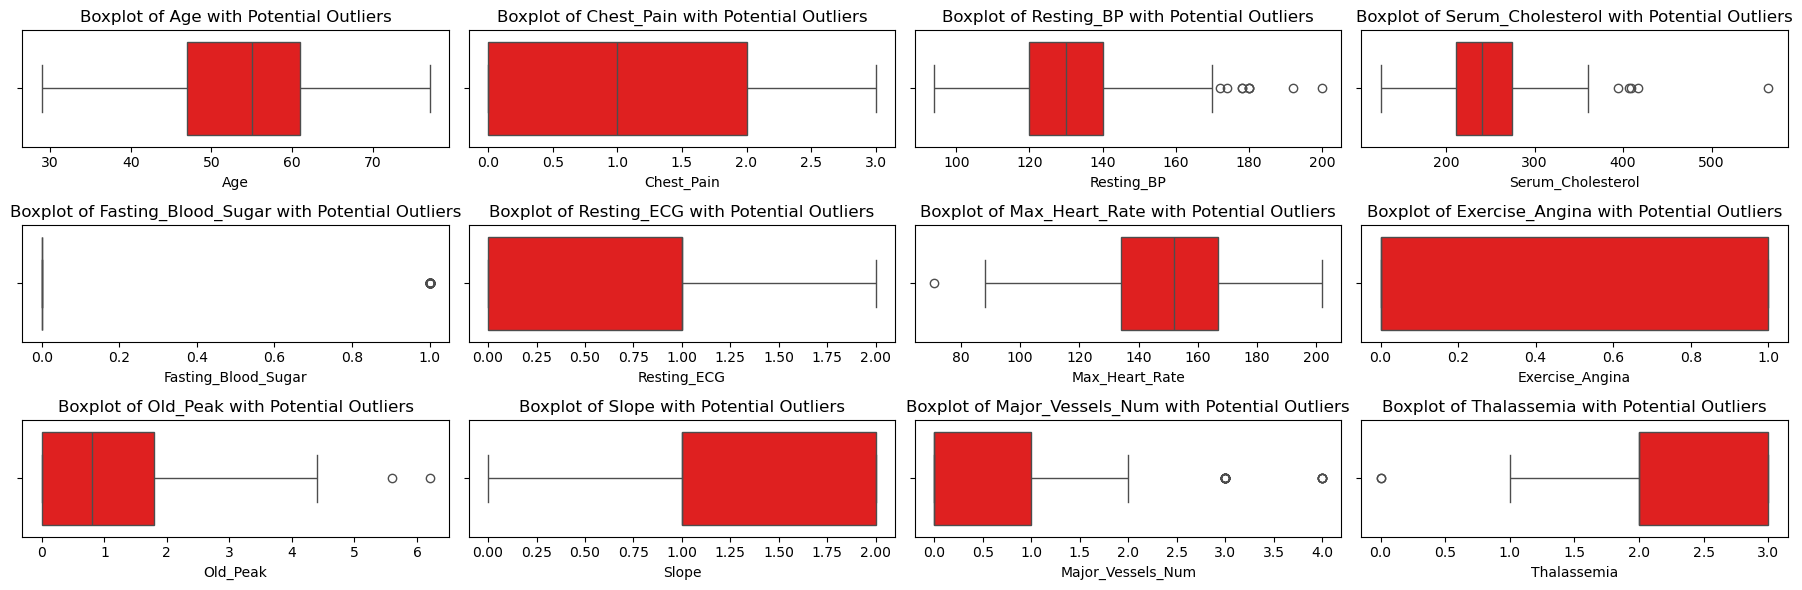

Numerical Variables with Potential Outliers:
Resting_BP
Serum_Cholesterol
Fasting_Blood_Sugar
Max_Heart_Rate
Old_Peak
Major_Vessels_Num
Thalassemia


In [192]:
# Checking for potential outliers among the numerical values 
potential_outliers = {}

plt.figure(figsize=(18, 6))

# Function to identify and plot outliers for numerical columns
for i, col in enumerate(numerical,1):
    # Calculate Q1 and Q3 values
    Q1 = heart_clean[col].quantile(0.25)
    Q3 = heart_clean[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and store potential outliers
    potential_outliers[col] = heart_clean[(heart_clean[col] < lower_bound) | (heart_clean[col] > upper_bound)]

    # Plot boxplot for the column
    plt.subplot(3, 4, i)
    sns.boxplot(x=heart_clean[col], color = 'r')
    plt.title(f"Boxplot of {col} with Potential Outliers")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Print the numerical columns containing potential outliers
label = font.apply(f"Numerical Variables with Potential Outliers:", 'Bold/Red/Underline')
print('\033[20m'+ label)
for col, data in potential_outliers.items():
    if not data.empty:
        print(font.apply(col, "Red"))

Feature: Resting_BP
lower_bound 90.0
upper_bound 170.0


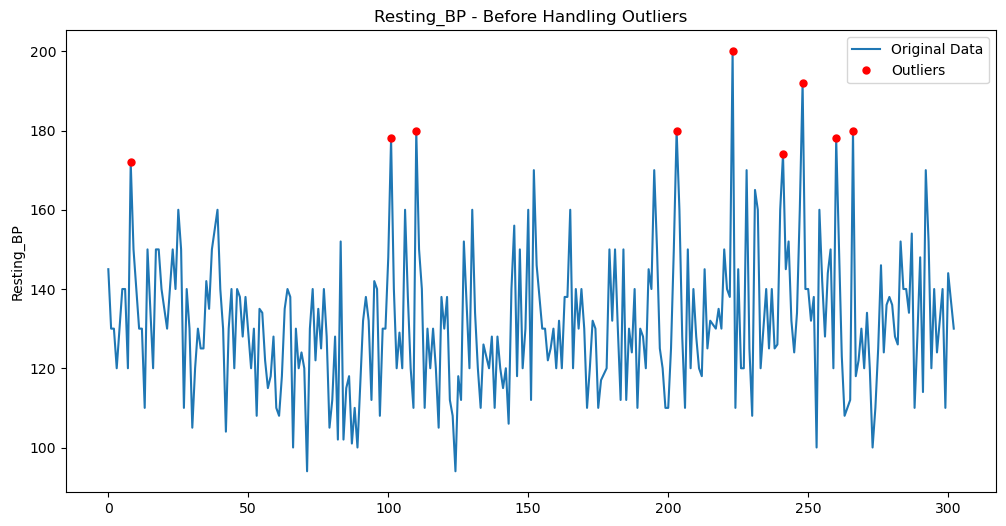

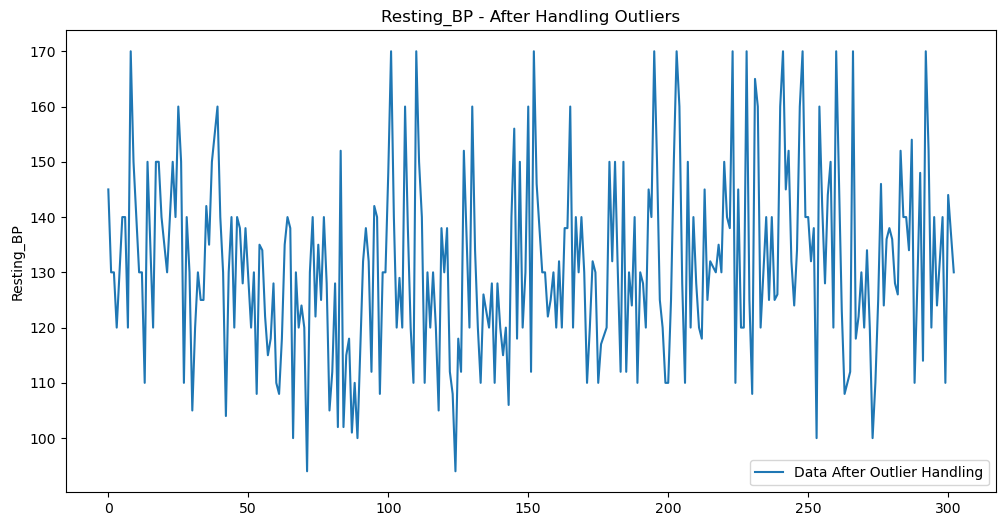

Feature: Serum_Cholesterol
lower_bound 115.0
upper_bound 371.0


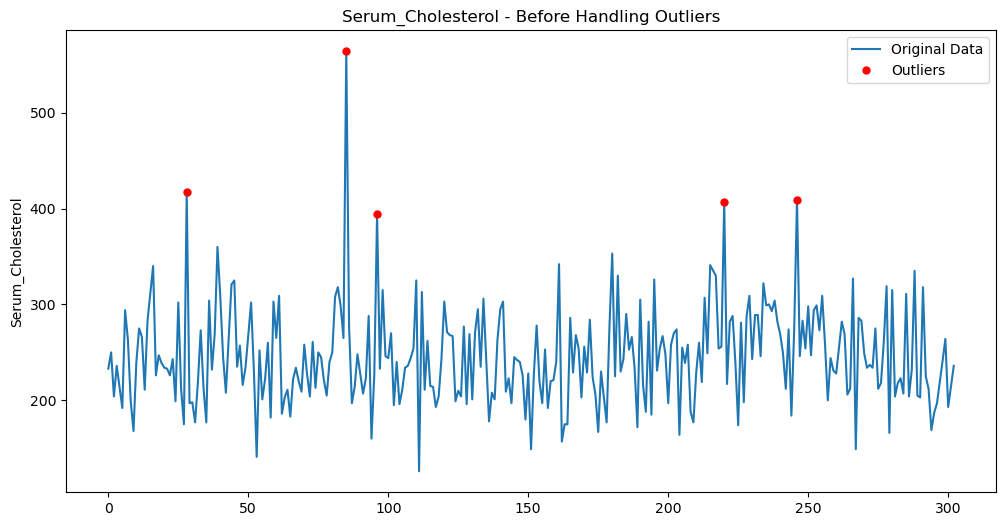

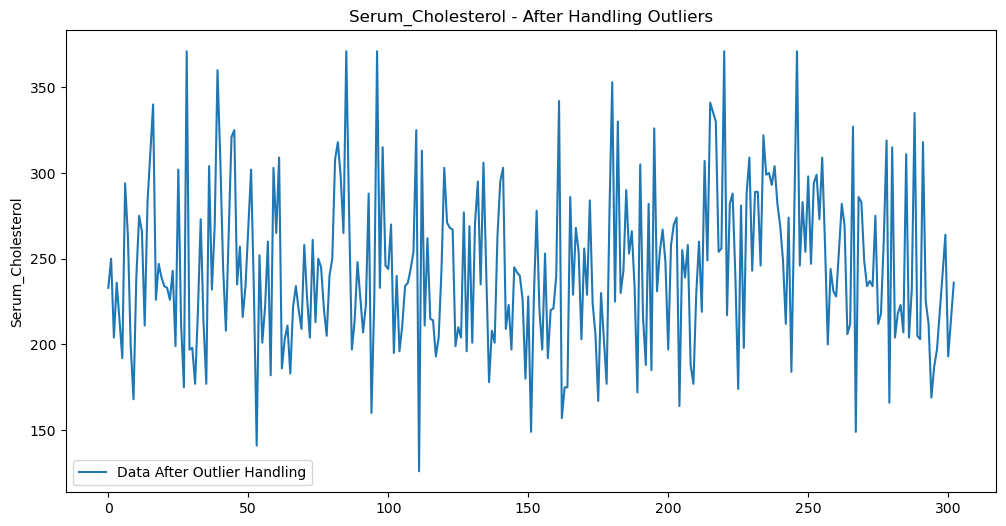

Feature: Max_Heart_Rate
lower_bound 84.5
upper_bound 216.5


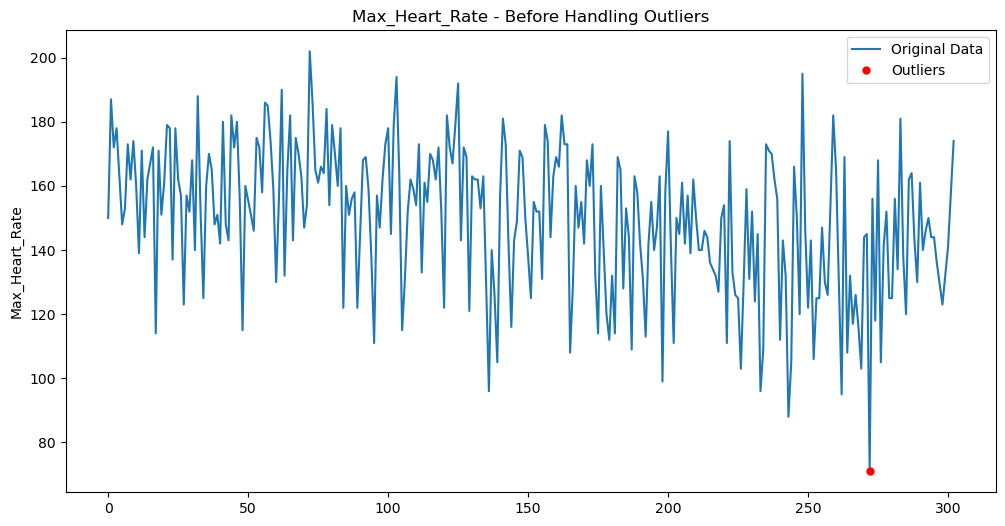

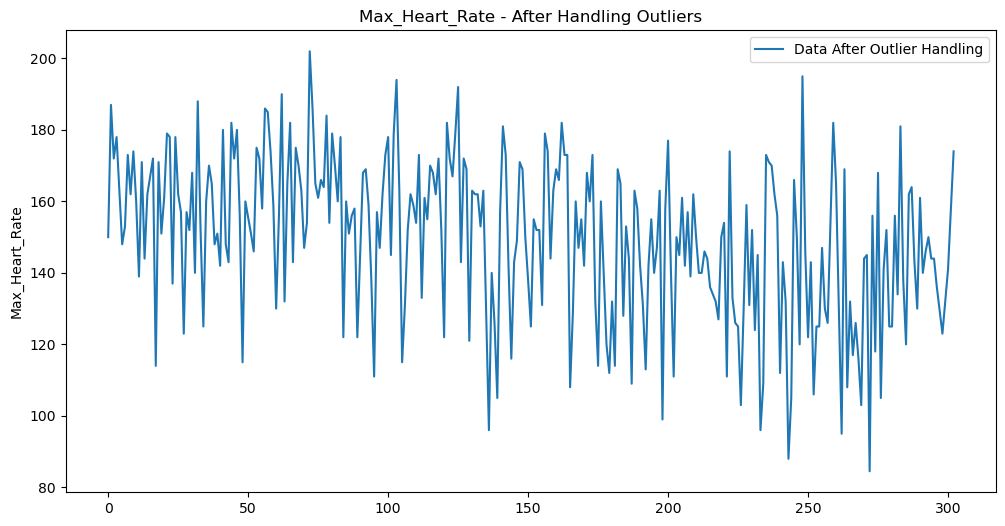

Feature: Old_Peak
lower_bound -2.7
upper_bound 4.5


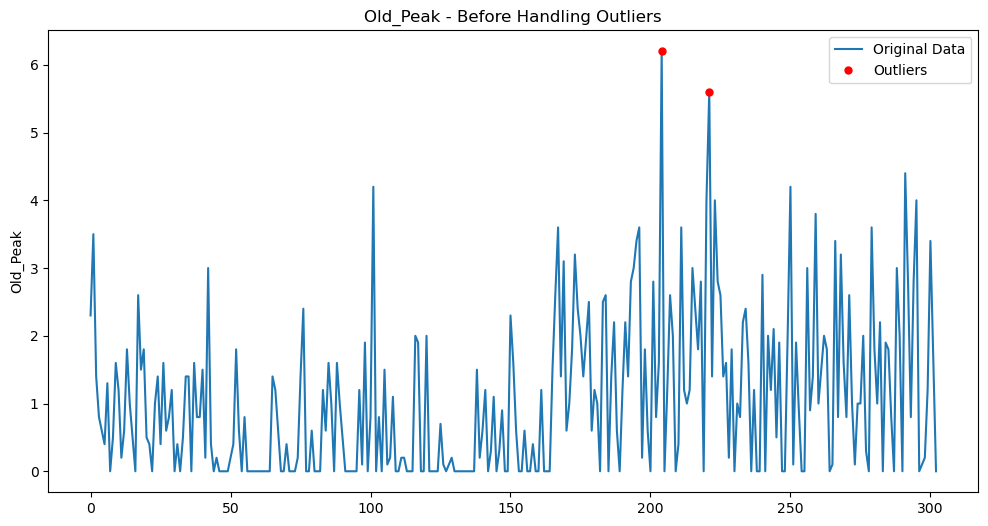

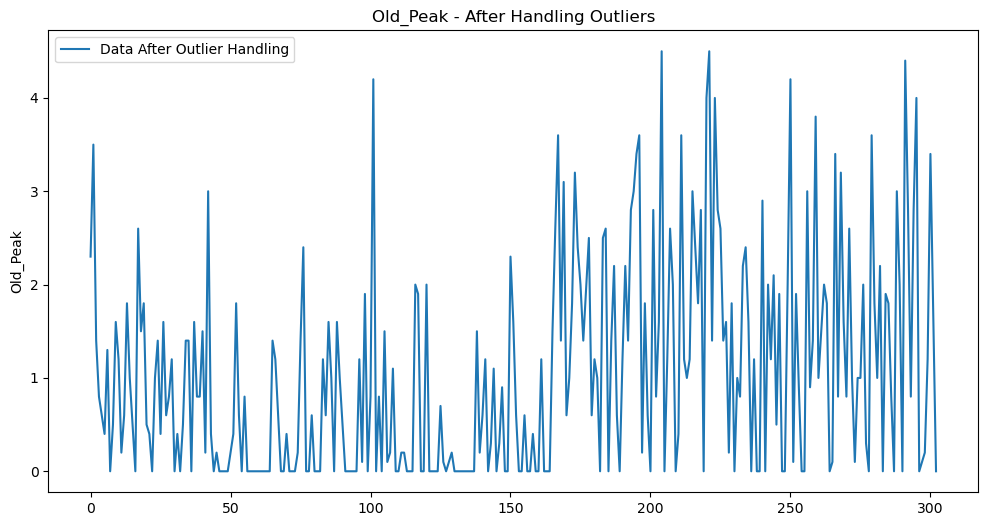

Feature: Major_Vessels_Num
lower_bound -1.5
upper_bound 2.5


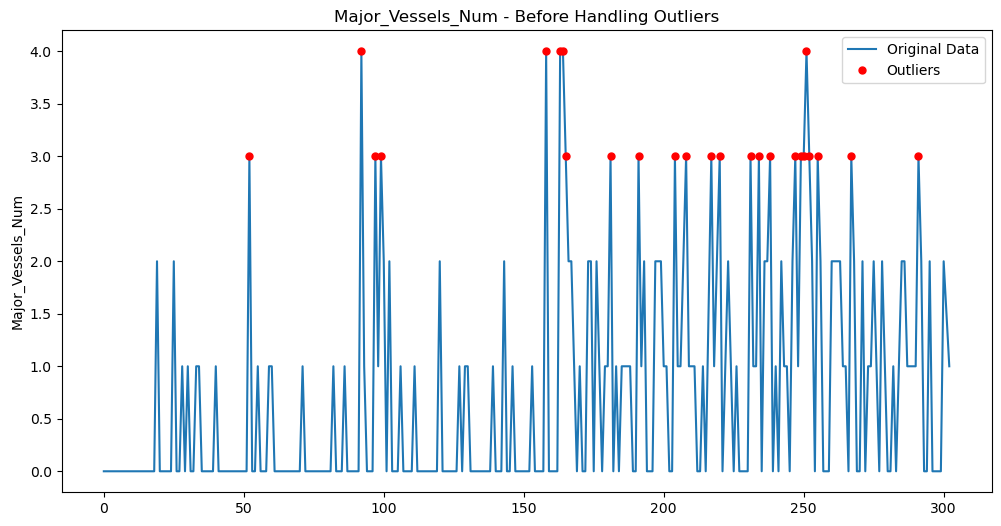

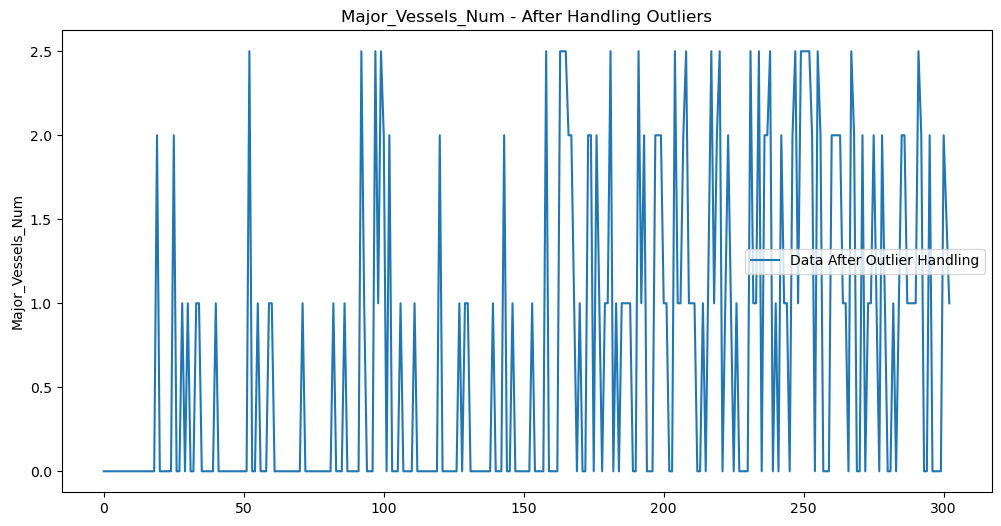

Feature: Thalassemia
lower_bound 0.5
upper_bound 4.5


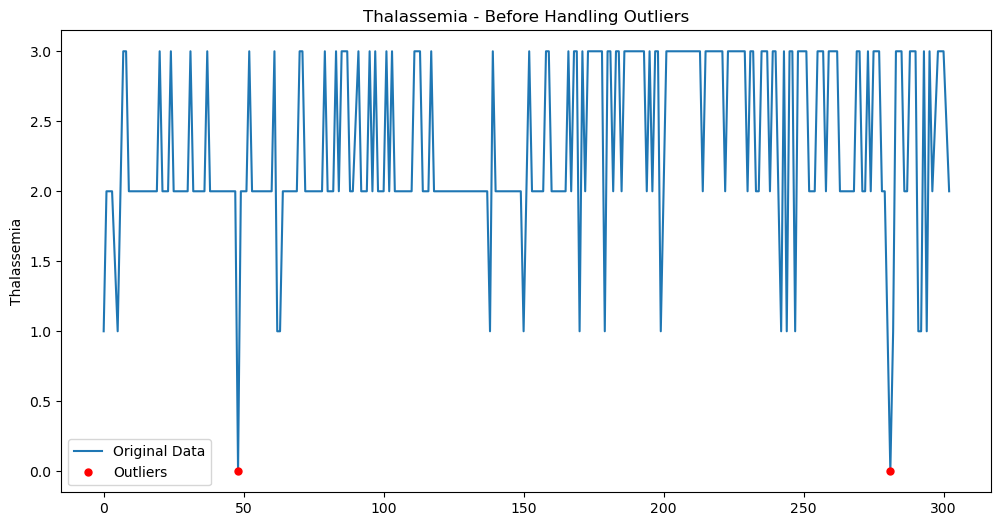

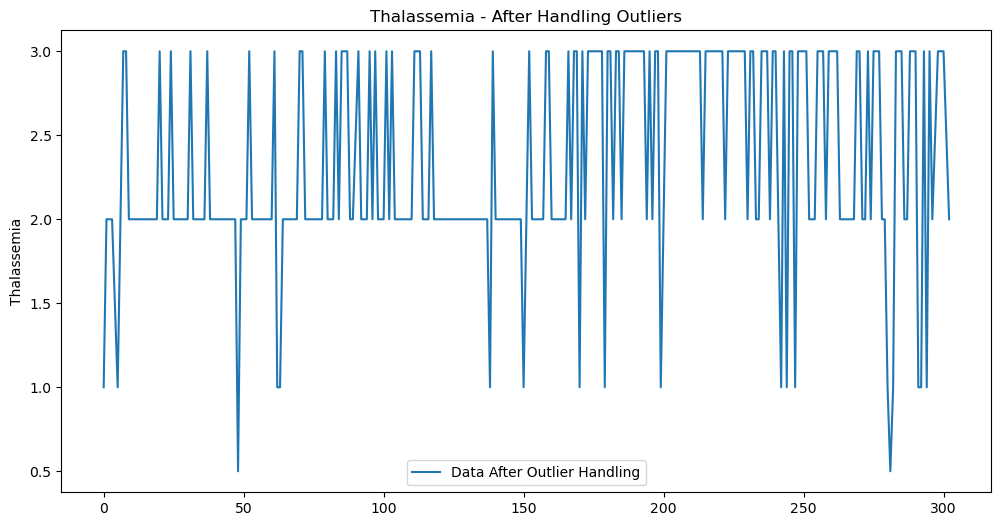

In [194]:
# Removing Outliers

columns_values = ['Resting_BP', 'Serum_Cholesterol', 'Max_Heart_Rate', 'Old_Peak', 'Major_Vessels_Num', 'Thalassemia']
for i, feature in enumerate(columns_values, 1):
    # Calculate IQR to identify anomalies
    Q1 = heart_clean[feature].quantile(0.25)
    Q3 = heart_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for anomalies
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print ("Feature:", feature)
    print("lower_bound", lower_bound)
    print("upper_bound", upper_bound)
    
    # Identify anomalies (outliers)
    heart_clean['Anomaly_IQR'] = (heart_clean[feature] < lower_bound) | (heart_clean[feature] > upper_bound)
    
    # Plot data before handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(heart_clean.index, heart_clean[feature], label='Original Data')
    plt.plot(heart_clean[heart_clean['Anomaly_IQR']].index, heart_clean[heart_clean['Anomaly_IQR']][feature], 'ro', markersize=5, label='Outliers')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - Before Handling Outliers')
    plt.legend()
    plt.show()
    
    # Handle outliers by clipping
    heart_clean[feature] = heart_clean[feature].clip(lower=lower_bound, upper=upper_bound)
    
    # Plot data after handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(heart_clean.index, heart_clean[feature], label='Data After Outlier Handling')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - After Handling Outliers')
    plt.legend()
    plt.show()

In [196]:
# Dropping the 'Anomaly_IQR' column added during the outlier visualization step
heart_clean = heart_clean.drop(columns=['Anomaly_IQR'], errors='ignore')

In [198]:
# C – Appropriately encoding categorical variables
heart_clean = pd.get_dummies(heart_clean, columns=categorical, drop_first=True)
# Convert all boolean columns to integers
for column in heart_clean.select_dtypes(include=['bool']).columns:
    heart_clean[column] = heart_clean[column].astype(int)

heart_clean  # To display encoded dataframe

,Age,Chest_Pain,Resting_BP,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Old_Peak,Slope,Major_Vessels_Num,Thalassemia,Sex_male,Heart_Disease_yes
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,0,1
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1,1
5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,124.0,197.0,0,1,136.0,1,0.0,1,0.0,2.0,0,0
298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0.0,3.0,0,0
299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0.0,3.0,1,0
300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,3.0,1,0


In [200]:
# B – Performing scaling or normalization
scaler = StandardScaler()  # Standardize features

X = heart_clean.drop(columns=['Heart_Disease_yes'])  # Features (X - independent variables)
y = heart_clean['Heart_Disease_yes']  # Target variable (y-dependent variable)

# Standardizing the features
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  # Apply standardization

In [202]:
# D – Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (234, 13) (234,)
Testing Set: (59, 13) (59,)


In [204]:
### TASK 2 – Model Building with Hyper-parameter Tuning

In [221]:
# A – Selecting an appropriate classification algorithm

print(font.apply("Model Selection and Hyperparameter Tuning using GridSearch", 'Black/Bold/Yellow_BG'))
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

#B – Implementing hyperparameter tuning by conducting a grid search

param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': np.logspace(1, 3, 10, dtype=int),
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': np.logspace(-3, 3, 50),
        'kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': np.logspace(0, 2, 10, dtype=int),
        'weights': ['uniform', 'distance']
    },
    "Naïve Bayes": {
        'var_smoothing': np.logspace(-9, 0, 50)
    },
    "Logistic Regression": {
        'C': np.logspace(-4, 0, 30),
        'solver': ['liblinear']
    }
}

best_models = {}

for model_name, model in models.items():
    print(font.apply(f"\nTuning hyperparameters for {model_name}", 'Blue/Bold/Underline'))
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Model Selection and Hyperparameter Tuning using GridSearch

Tuning hyperparameters for Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Tuning hyperparameters for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 0.09102981779915217, 'kernel': 'linear'}

Tuning hyperparameters for K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'n_neighbors': 35, 'weights': 'uniform'}

Tuning hyperparameters for Naïve Bayes
Best parameters for Naïve Bayes: {'var_smoothing': 1e-09}

Tuning hyperparameters for Logistic Regression
Best parameters for Logistic Regression: {'C': 0.07880462815669913, 'solver': 'liblinear'}


Model Building and Calculating the Confusion Matrix

Training and Evaluation of Random Forest
Accuracy for Random Forest: 0.847457627118644
ROC-AUC Score for Random Forest: 0.9282407407407407
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.83      0.91      0.87        32

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



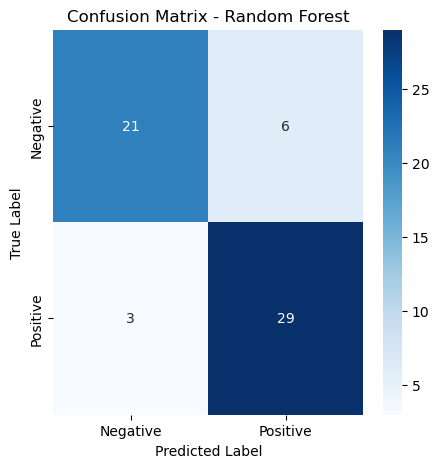


Training and Evaluation of Support Vector Machine
Accuracy for Support Vector Machine: 0.864406779661017
ROC-AUC Score for Support Vector Machine: 0.9363425925925926
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        32

    accuracy                           0.86        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59



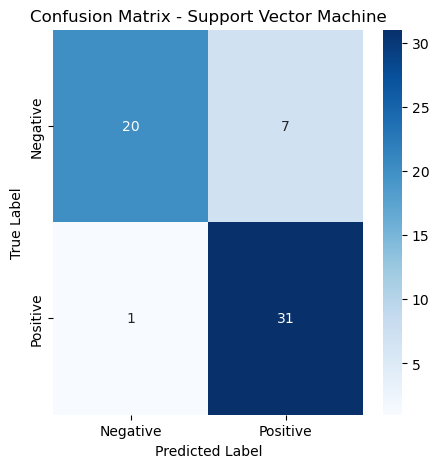


Training and Evaluation of K-Nearest Neighbors
Accuracy for K-Nearest Neighbors: 0.847457627118644
ROC-AUC Score for K-Nearest Neighbors: 0.9126157407407408
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        27
           1       0.78      1.00      0.88        32

    accuracy                           0.85        59
   macro avg       0.89      0.83      0.84        59
weighted avg       0.88      0.85      0.84        59



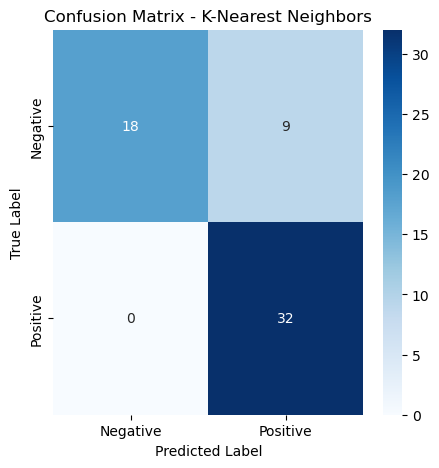


Training and Evaluation of Naïve Bayes
Accuracy for Naïve Bayes: 0.8135593220338984
ROC-AUC Score for Naïve Bayes: 0.8842592592592593
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.82      0.84      0.83        32

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59



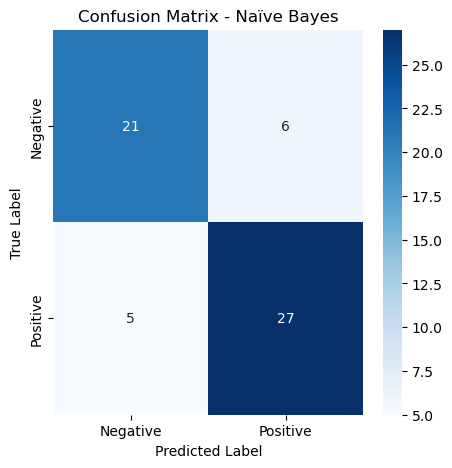


Training and Evaluation of Logistic Regression
Accuracy for Logistic Regression: 0.864406779661017
ROC-AUC Score for Logistic Regression: 0.9212962962962964
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        32

    accuracy                           0.86        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59



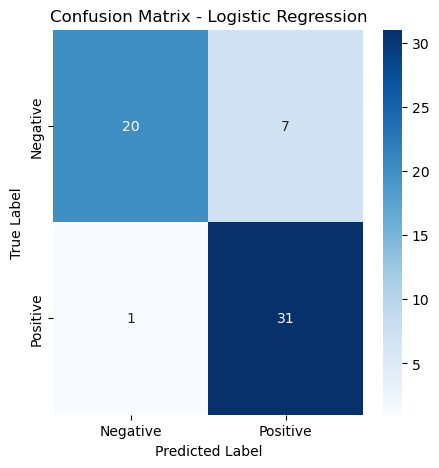


Building and evaluation of models completed.


In [223]:
# C – Building the classification model using training data 
print(font.apply("Model Building and Calculating the Confusion Matrix", 'Black/Bold/Yellow_BG'))

for model_name, model in best_models.items():
    print(font.apply(f"\nTraining and Evaluation of {model_name}", 'Blue/Bold/Underline'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Print evaluation metrics
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"ROC-AUC Score for {model_name}: {roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'}")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # A – Calculating and analysing the Confusion Matrix
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

print(font.apply("\nBuilding and evaluation of models completed.", 'Black/Bold'))

In [212]:
### TASK 3 – Model Evaluation and Selection


Confusion Matrix for Random Forest


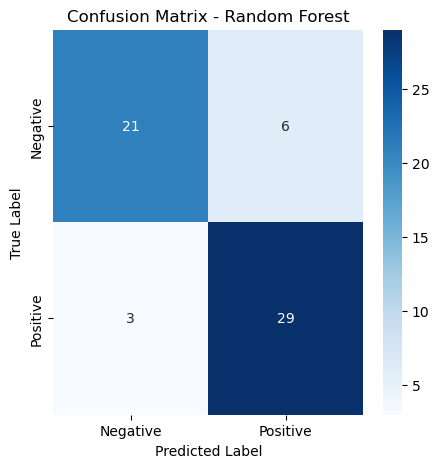


Confusion Matrix for Support Vector Machine


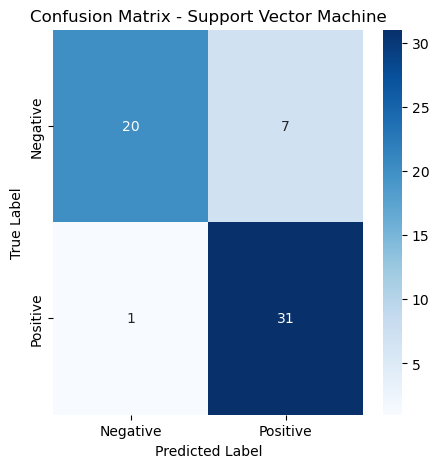


Confusion Matrix for K-Nearest Neighbors


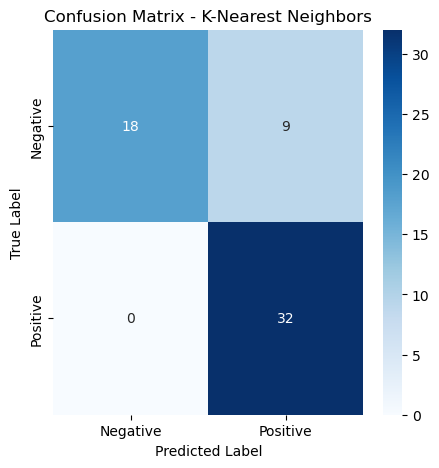


Confusion Matrix for Naïve Bayes


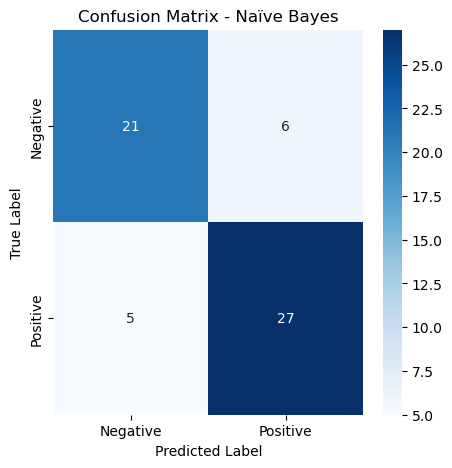


Confusion Matrix for Logistic Regression


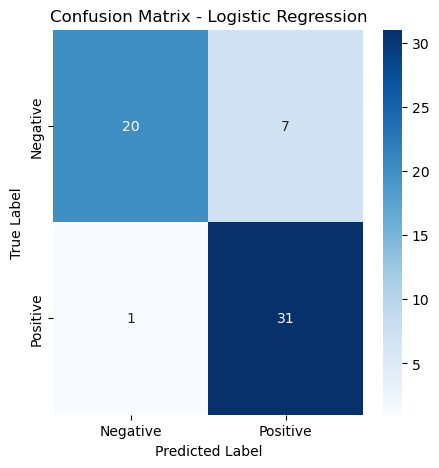

In [225]:
# A – Calculating and analysing the Confusion Matrix
conf_matrices = {}

for model_name, model in best_models.items():
    print(font.apply(f"\nConfusion Matrix for {model_name}", 'Blue/Bold/Underline'))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store for comparison
    conf_matrices[model_name] = cm
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [227]:
# B – Evaluating the performance of the regression models using appropriate metrics

metrics_data = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results for later comparison
    metrics_data.append([model_name, accuracy, precision, recall, f1])
    
    print(font.apply(f"\nModel Evaluation for {model_name}", 'Blue/Bold/Underline'))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(font.apply("\nSummary of Performance Metrics across Models\n", 'Blue/Bold/Underline/Yellow_BG'))
metrics_df


Model Evaluation for Random Forest
Accuracy: 0.8475
Precision: 0.8286
Recall: 0.9062
F1-score: 0.8657
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.83      0.91      0.87        32

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59


Model Evaluation for Support Vector Machine
Accuracy: 0.8644
Precision: 0.8158
Recall: 0.9688
F1-score: 0.8857
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        32

    accuracy                           0.86        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59


Model Evaluation for K-Nearest Neighbors
Accuracy: 0.8475
Precision: 0.7805
Recall: 

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.847458,0.828571,0.90625,0.865672
1,Support Vector Machine,0.864407,0.815789,0.96875,0.885714
2,K-Nearest Neighbors,0.847458,0.780488,1.00000,0.876712
3,Naïve Bayes,0.813559,0.818182,0.84375,0.830769
4,Logistic Regression,0.864407,0.815789,0.96875,0.885714


In [229]:
# C – Implementing k-fold cross-validation
print(font.apply("\nCross-validation Results\n", 'Blue/Bold/Underline'))
k_fold = 5
cv_results = {}

for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"\n{k_fold}-Fold Cross-Validation for {model_name}:")
    print(f"Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")


Cross-validation Results


5-Fold Cross-Validation for Random Forest:
Mean Accuracy: 0.8205, Standard Deviation: 0.0547

5-Fold Cross-Validation for Support Vector Machine:
Mean Accuracy: 0.8418, Standard Deviation: 0.0480

5-Fold Cross-Validation for K-Nearest Neighbors:
Mean Accuracy: 0.8162, Standard Deviation: 0.0397

5-Fold Cross-Validation for Naïve Bayes:
Mean Accuracy: 0.8418, Standard Deviation: 0.0441

5-Fold Cross-Validation for Logistic Regression:
Mean Accuracy: 0.8419, Standard Deviation: 0.0610


In [231]:
# D – Selecting the best-performing classification model based on hyperparameter tuning and cross-validation results

best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
best_model = best_models[best_model_name]

print(font.apply(f"\nBest Model Based on Cross-Validation Results: [{best_model_name.upper()}]\n", 'Blue/Bold/Underline/Yellow_BG'))
print(font.apply(f"{best_model_name} with Mean Accuracy: {scores.mean():.4f}", 'Blue/Bold'))
print(font.apply(f"\nJustifications for selecting {best_model_name}", 'Black/Bold/Underline'))
print(justifications.get(best_model_name, "No specific justification found."))
print("* Selected based on the highest mean accuracy across k-Fold Cross-Validation.")
print("* Ensures better generalization performance across different data splits.")
print("* Suitable for the business problem by minimizing classification errors while maintaining a balance between precision and recall.")


# Model-specific justifications
justifications = {
    "Random Forest": "* Random Forest is chosen because it performs well on high-dimensional data, and is robust to noisy features.",
    "Support Vector Machine": "* SVM is chosen because it generalizes well in high-dimensional spaces and is effective when feature interactions are important.",
    "K-Nearest Neighbors": "* KNN is chosen because it provides good local decision boundaries, making it useful for non-linear datasets.",
    "Naïve Bayes": "* Naïve Bayes is chosen because it is computationally efficient and interpretable, especially for categorical or text data.",
    "Logistic Regression": "* Logistic Regression is chosen because the relationship between features and the outcome is mostly linear."
}



Best Model Based on Cross-Validation Results: [LOGISTIC REGRESSION]

Logistic Regression with Mean Accuracy: 0.8419

Justifications for selecting Logistic Regression
* Logistic Regression is chosen because the relationship between features and the outcome is mostly linear.
* Selected based on the highest mean accuracy across k-Fold Cross-Validation.
* Ensures better generalization performance across different data splits.
* Suitable for the business problem by minimizing classification errors while maintaining a balance between precision and recall.
